In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

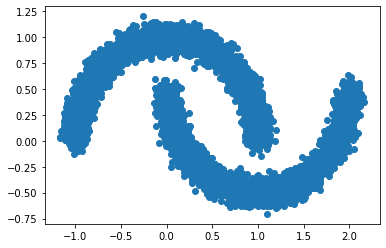

In [2]:
from sklearn.datasets import make_moons
data, _ = make_moons(10000, noise=0.06, random_state=0)
plt.scatter(*data.T)


Main information

[ALGORITHM] GrowingNeuralGas

[OPTION] after_split_error_decay_rate = 0.5
[OPTION] error_decay_rate = 0.995
[OPTION] max_edge_age = 50
[OPTION] max_nodes = 100
[OPTION] min_distance_for_update = 0.2
[OPTION] n_inputs = 2
[OPTION] n_iter_before_neuron_added = 100
[OPTION] n_start_nodes = 2
[OPTION] neighbour_step = 0.001
[OPTION] show_epoch = 1
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] step = 0.1
[OPTION] verbose = True



([], [])

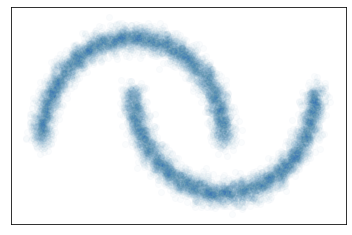

In [18]:
from tqdm import tqdm_notebook as tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from neupy import algorithms, utils
    
utils.reproducible()

gng = algorithms.GrowingNeuralGas(
    n_inputs=2,
    n_start_nodes=2,

    shuffle_data=True,
    verbose=True,
    
    step=0.1,
    neighbour_step=0.001,
    
    max_edge_age=50,
    max_nodes=100,
    
    n_iter_before_neuron_added=100,
    after_split_error_decay_rate=0.5,
    error_decay_rate=0.995,
    min_distance_for_update=0.2,
)

fig = plt.figure()
plt.scatter(*data.T, alpha=0.02)
plt.xticks([], [])
plt.yticks([], [])



In [20]:
gng.train(data, epochs=80)

#60 : [660 ms] train: 0.047147


#61 : [670 ms] train: 0.047096


#62 : [669 ms] train: 0.047188


#63 : [678 ms] train: 0.047099


#64 : [677 ms] train: 0.047053


#65 : [663 ms] train: 0.047076


#66 : [671 ms] train: 0.047112


#67 : [677 ms] train: 0.047147


#68 : [674 ms] train: 0.046986


#69 : [666 ms] train: 0.046986


#70 : [666 ms] train: 0.047189


#71 : [662 ms] train: 0.046976


#72 : [668 ms] train: 0.047040


#73 : [678 ms] train: 0.047021


#74 : [669 ms] train: 0.046990


#75 : [680 ms] train: 0.047041


#76 : [714 ms] train: 0.047111


#77 : [685 ms] train: 0.046825


#78 : [672 ms] train: 0.047160


#79 : [674 ms] train: 0.047070


#80 : [680 ms] train: 0.046927


#81 : [665 ms] train: 0.047139


#82 : [664 ms] train: 0.047065


#83 : [655 ms] train: 0.047030


#84 : [656 ms] train: 0.047134


#85 : [663 ms] train: 0.047039


#86 : [662 ms] train: 0.047093


#87 : [660 ms] train: 0.047259


#88 : [648 ms] train: 0.047038


#89 : [697 ms] train: 0.046965


#90 : [672 ms] train: 0.047134


#91 : [659 ms] train: 0.047101


#92 : [671 ms] train: 0.047148


#93 : [665 ms] train: 0.047048


#94 : [667 ms] train: 0.047099


#95 : [708 ms] train: 0.047124


#96 : [677 ms] train: 0.047061


#97 : [663 ms] train: 0.047079


#98 : [677 ms] train: 0.047094


#99 : [661 ms] train: 0.047015


#100 : [658 ms] train: 0.047050


#101 : [662 ms] train: 0.047036


#102 : [698 ms] train: 0.047125


#103 : [709 ms] train: 0.047147


#104 : [673 ms] train: 0.047124


#105 : [673 ms] train: 0.047155


#106 : [665 ms] train: 0.047059


#107 : [668 ms] train: 0.046944


#108 : [665 ms] train: 0.047084


#109 : [667 ms] train: 0.047032


#110 : [676 ms] train: 0.047087


#111 : [672 ms] train: 0.046955


#112 : [679 ms] train: 0.047144


#113 : [679 ms] train: 0.047095


#114 : [669 ms] train: 0.047008


#115 : [663 ms] train: 0.047097


#116 : [666 ms] train: 0.047140


#117 : [669 ms] train: 0.047106


#118 : [681 ms] train: 0.047182


#119 : [679 ms] train: 0.046980


#120 : [675 ms] train: 0.047214


#121 : [676 ms] train: 0.047122


#122 : [686 ms] train: 0.047104


#123 : [684 ms] train: 0.047171


#124 : [664 ms] train: 0.047031


#125 : [670 ms] train: 0.047156


#126 : [674 ms] train: 0.047070


#127 : [668 ms] train: 0.047101


#128 : [671 ms] train: 0.047105


#129 : [671 ms] train: 0.047246


#130 : [677 ms] train: 0.047207


#131 : [676 ms] train: 0.047102


#132 : [672 ms] train: 0.047171


#133 : [670 ms] train: 0.047253


#134 : [668 ms] train: 0.047002


#135 : [686 ms] train: 0.047037


#136 : [666 ms] train: 0.047058


#137 : [659 ms] train: 0.047226


#138 : [678 ms] train: 0.047292
#139 : [655 ms] train: 0.047035


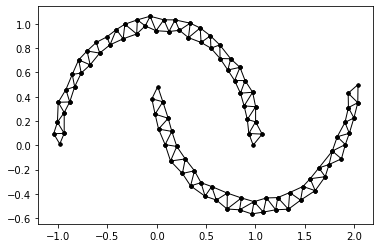

In [21]:
lines = []
for node_1, node_2 in gng.graph.edges:
        weights = np.concatenate([node_1.weight, node_2.weight])
        line, = plt.plot(*weights.T, color='black')

        plt.setp(line, linewidth=1, color='black')
        
        lines.append(line)
        lines.append(plt.scatter(*weights.T, color='black', s=10))

In [ ]:
def animate(i):
    for line in animate.prev_lines:
        line.remove()
        
    # Training will slow down overtime and we increase number
    # of data samples for training
    n = int(0.5 * gng.n_iter_before_neuron_added * (1 + i // 100))
    
    sampled_data_ids = np.random.choice(len(data), n)
    sampled_data = data[sampled_data_ids, :]
    gng.train(sampled_data, epochs=1)
    
    lines = []
    for node_1, node_2 in gng.graph.edges:
        weights = np.concatenate([node_1.weight, node_2.weight])
        line, = plt.plot(*weights.T, color='black')

        plt.setp(line, linewidth=1, color='black')
        
        lines.append(line)
        lines.append(plt.scatter(*weights.T, color='black', s=10))
    
    animate.prev_lines = lines
    return lines


animate.prev_lines = []
anim = animation.FuncAnimation(fig, animate, tqdm(np.arange(220)), interval=30, blit=True)
HTML(anim.to_html5_video())